In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

/home/rmdstic/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [5]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

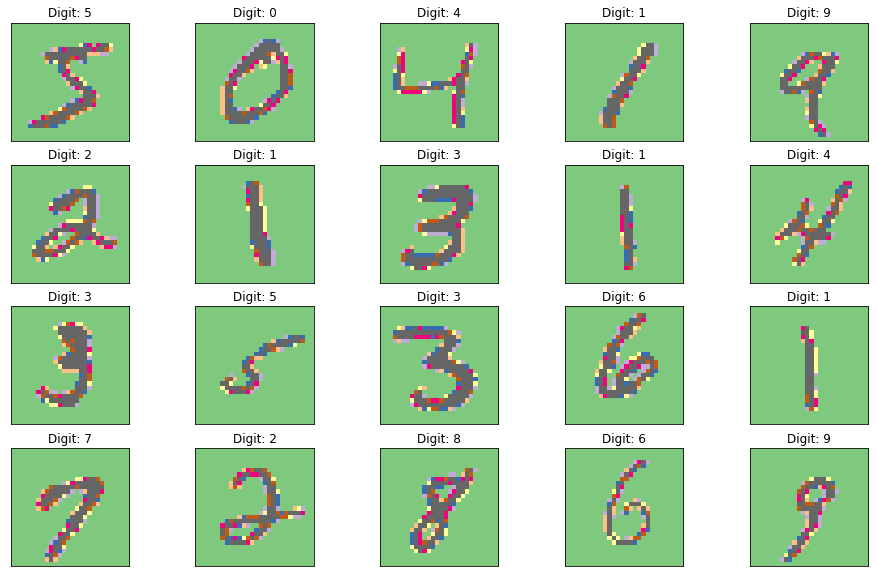

In [6]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap =plt.get_cmap( 'Accent'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize =( 16 , 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
plt.show()

In [7]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [8]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [9]:
model = Sequential([
Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
MaxPooling2D((2,2)),
Flatten(),
Dense(100,activation="relu"),
Dense(10,activation="softmax")
])

In [10]:
optimizer = SGD(learning_rate =0.01 , momentum=0.9)
model.compile(
optimizer=optimizer,
loss ="sparse_categorical_crossentropy",
metrics =[ "accuracy"]
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [12]:
Model_log= model.fit(X_train, y_train, epochs = 10 , batch_size = 15 ,verbose= 1 ,validation_data = 0 );

Epoch 1/10
4000/4000 [==============================] - 40s 10ms/step - loss: 0.1713 - accuracy: 0.9469
Epoch 2/10
4000/4000 [==============================] - 41s 10ms/step - loss: 0.0545 - accuracy: 0.9838
Epoch 3/10
4000/4000 [==============================] - 45s 11ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 4/10
4000/4000 [==============================] - 43s 11ms/step - loss: 0.0232 - accuracy: 0.9928
Epoch 5/10
4000/4000 [==============================] - 47s 12ms/step - loss: 0.0150 - accuracy: 0.9955
Epoch 6/10
4000/4000 [==============================] - 35s 9ms/step - loss: 0.0102 - accuracy: 0.9971
Epoch 7/10
4000/4000 [==============================] - 42s 10ms/step - loss: 0.0070 - accuracy: 0.9978
Epoch 8/10
4000/4000 [==============================] - 40s 10ms/step - loss: 0.0041 - accuracy: 0.9990
Epoch 9/10
4000/4000 [==============================] - 42s 10ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 10/10
4000/4000 [==============================] - 41s 10ms

1/1 [==============================] - 0s 21ms/step


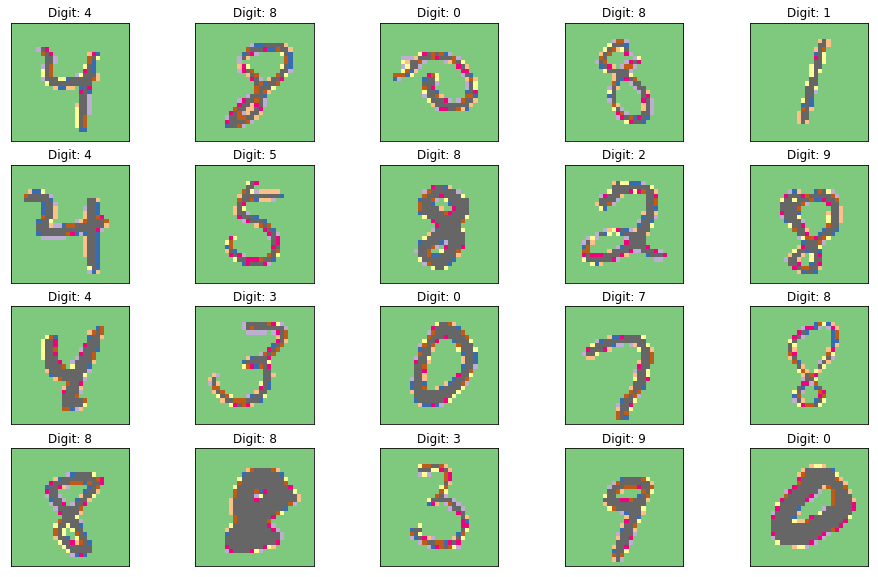

In [13]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()

In [14]:
predictions = np.argmax(model.predict(X_test),axis=-1)
accuracy_score(y_test,predictions)

313/313 [==============================] - 2s 5ms/step


0.9895

TypeError: Invalid dimensions for image data

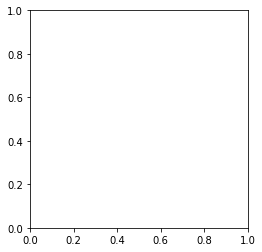

In [15]:
n=random.randint( 0, 9999 )
plt.imshow(X_test[n])
plt.show()

In [16]:
predicted_value = model . predict(X_test)
print( "Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 4ms/step
Handwritten number in the image is= 9


In [17]:
score = model .evaluate(X_test, y_test, verbose=0)
print('Test loss : ',score[0])
print('Test accuracy : ',score[1])

Test loss :  0.04157715290784836
Test accuracy :  0.9894999861717224
